# Predict Loan Eligibility for Dream Housing Finance company

1. **About Data**:
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

2. **Attribute Information**:

- Loan_ID: Unique Loan ID
- Gender	Male/ Female
- Married	Applicant married (Y/N)
- Dependents	Number of dependents
- Education	Applicant Education (Graduate/ Under Graduate)
- Self_Employed	Self employed (Y/N)
- ApplicantIncome	Applicant income
- CoapplicantIncome	Coapplicant income
- LoanAmount	Loan amount in thousands
- Loan_Amount_Term	Term of loan in months
- Credit_History	credit history meets guidelines
- Property_Area	Urban/ Semi Urban/ Rural
- Loan_Status	(Target) Loan approved (Y/N)

3. **Evaluation Metric**:

*Accuracy*

## Importing Libraries

In [1]:
#for managing dataframes
import pandas as pd

#for numerical operations
import numpy as np
 
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for imputations
import statistics

#for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

## Reading Datasets

In [2]:
#load dataset
loan_train = pd.read_csv('train_ctrUa4K.csv')
loan_test = pd.read_csv('test_lAUu6dG.csv')
loan_submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [3]:
#checking head and tail of the datasets
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
#checking features datatypes
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
loan_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [7]:
#checking statistics
loan_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002287,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
loan_test.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP002605,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [9]:
#checking for unique values of each feature
loan_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
loan_test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

From this we can see that there is no difference in categorical attributes of both train and test sets.

In [11]:
#checking for missing values
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

We will be imputing missing values after performing EDA.

## EDA
We will be performing Bivariate Analysis

### Gender

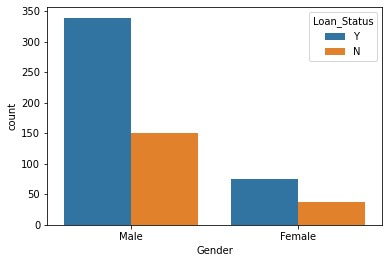

In [13]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_train);

### Married

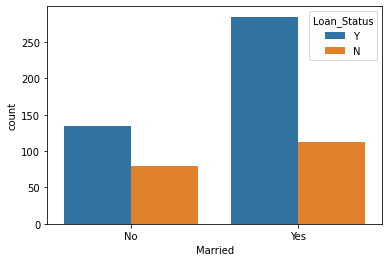

In [14]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_train);

### Dependents

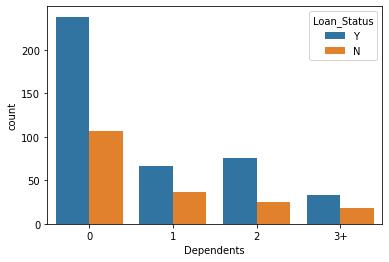

In [15]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_train);

### Education

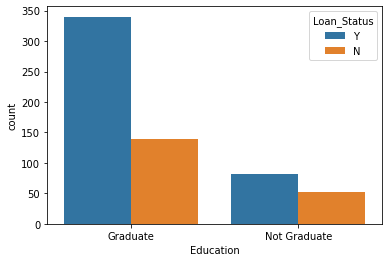

In [16]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_train);

### Self Employed

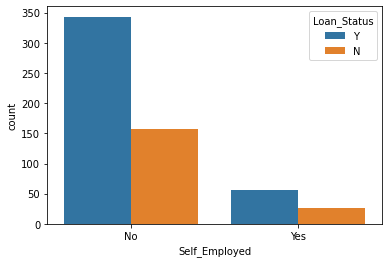

In [17]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_train);

### ApplicantIncome

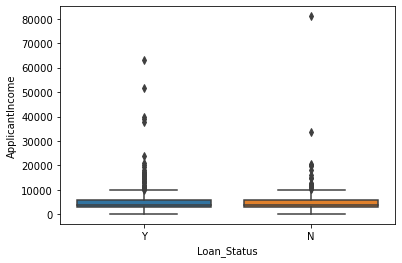

In [18]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=loan_train);

### CoapplicantIncome

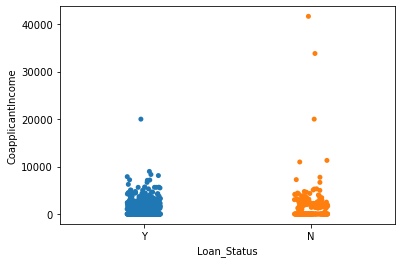

In [19]:
sns.stripplot(x='Loan_Status',y='CoapplicantIncome',data=loan_train);

### LoanAmount

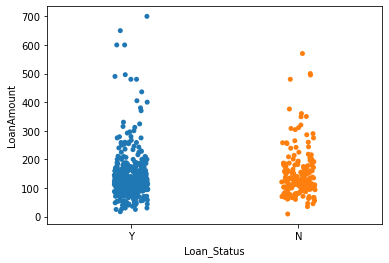

In [20]:
sns.stripplot(x='Loan_Status',y='LoanAmount',data=loan_train);

### Loan_Amount_Term

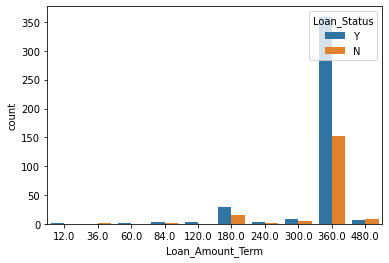

In [21]:
sns.countplot(hue='Loan_Status',x='Loan_Amount_Term',data=loan_train);

### Credit_History

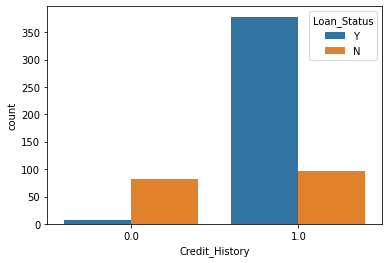

In [22]:
sns.countplot(hue='Loan_Status',x='Credit_History',data=loan_train);

### Property_Area

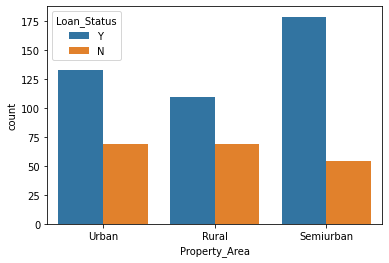

In [23]:
sns.countplot(hue='Loan_Status',x='Property_Area',data=loan_train);

### Loan_Status (univariate)

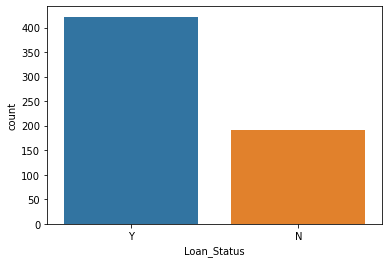

In [24]:
sns.countplot(x='Loan_Status',data=loan_train);

## Imputation

In [25]:
#Median Imputaion
statistics.median_low(loan_train['LoanAmount'])

280.0

In [26]:
loan_train['LoanAmount'].fillna(280.0,inplace=True)

In [27]:
statistics.median_low(loan_test['LoanAmount'])

135.0

In [28]:
loan_test['LoanAmount'].fillna(135.0,inplace=True)

In [29]:
#Mode Imputaion
loan_train['Gender'] = loan_train['Gender'].fillna(loan_train['Gender'].mode()[0])
loan_train['Married'] = loan_train['Married'].fillna(loan_train['Married'].mode()[0])
loan_train['Dependents'] = loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0])
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0])
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0])
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0])

In [30]:
loan_test['Gender'] = loan_test['Gender'].fillna(loan_test['Gender'].mode()[0])
loan_test['Dependents'] = loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0])
loan_test['Self_Employed'] = loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0])
loan_test['Loan_Amount_Term'] = loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0])
loan_test['Credit_History'] = loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0])

We will replace `3+` in **Dependents**.

In [31]:
loan_train['Dependents']=loan_train['Dependents'].replace("3+","3")
loan_test['Dependents']=loan_test['Dependents'].replace("3+","3")

loan_train['Dependents']=loan_train['Dependents'].astype('int64')
loan_test['Dependents']=loan_test['Dependents'].astype('int64')

## Dummification of categorical variables

In [32]:
#on train set
#one hot encoding each categorical attribute
dummy_tr_1=pd.get_dummies(loan_train['Gender'],drop_first=True,prefix='Gender',prefix_sep='_')
dummy_tr_2=pd.get_dummies(loan_train['Married'],drop_first=True,prefix='Married',prefix_sep='_')
dummy_tr_3=pd.get_dummies(loan_train['Education'],drop_first=True,prefix='Education',prefix_sep='_')
dummy_tr_4=pd.get_dummies(loan_train['Self_Employed'],drop_first=True,prefix='Self_Employed',prefix_sep='_')
dummy_tr_5=pd.get_dummies(loan_train['Property_Area'],drop_first=True,prefix='Property_Area',prefix_sep='_')

#concatenating one hot encoded attributes with original train set
loan_train=pd.concat([loan_train,dummy_tr_1,dummy_tr_2,dummy_tr_3,dummy_tr_4,dummy_tr_5],axis=1)

#Removing the original columns (one hot encoded attributes)
loan_train=loan_train.drop(columns=['Property_Area','Gender','Married','Self_Employed','Education'])

In [33]:
#on test set
dummy_te_1=pd.get_dummies(loan_test['Gender'],drop_first=True,prefix='Gender',prefix_sep='_')
dummy_te_2=pd.get_dummies(loan_test['Married'],drop_first=True,prefix='Married',prefix_sep='_')
dummy_te_3=pd.get_dummies(loan_test['Education'],drop_first=True,prefix='Education',prefix_sep='_')
dummy_te_4=pd.get_dummies(loan_test['Self_Employed'],drop_first=True,prefix='Self_Employed',prefix_sep='_')
dummy_te_5=pd.get_dummies(loan_test['Property_Area'],drop_first=True,prefix='Property_Area',prefix_sep='_')
loan_test=pd.concat([loan_test,dummy_te_1,dummy_te_2,dummy_te_3,dummy_te_4,dummy_te_5],axis=1)
loan_test=loan_test.drop(columns=['Property_Area','Gender','Married','Self_Employed','Education'])

## Assinging X and y

In [34]:
X = loan_train.drop(columns=['Loan_ID','Loan_Status'])
y = loan_train['Loan_Status']

test = loan_test.drop(columns=['Loan_ID'])

## Train Validation Split

In [35]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,
                                             random_state=77)

## Model Building

### Logistic Regression

In [36]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

y_pred_LR_tr=LR.predict(X_train)
y_pred_LR_val=LR.predict(X_val)

ac_lr_tr=accuracy_score(y_train,y_pred_LR_tr)
ac_lr_val=accuracy_score(y_val,y_pred_LR_val)

print('Train Accuracy')
print(ac_lr_tr*100)
print('Validation Accuracy')
print(ac_lr_val*100)

Train Accuracy
80.43478260869566
Validation Accuracy
83.76623376623377


#### GridSearchCV (Logistic Regression)

In [38]:
LR_GS=LogisticRegression()

scorers = {'accuracy_score': make_scorer(accuracy_score)}

params_grid_LR={'class_weight':['balanced',None], #2
                'C':[0.00001,0.0001,0.001,0.1,1,10,100], #7
                'solver':['newton-cg','sag','lbfgs']} #3

grid_search_LR=GridSearchCV(LR_GS,params_grid_LR,
                            n_jobs=-1,scoring=scorers,cv=5,refit='accuracy_score')

grid_search_LR.fit(X_train,y_train)
grid_search_LR.best_params_

{'C': 10, 'class_weight': None, 'solver': 'newton-cg'}

Now we will apply above parameters

In [39]:
LR_after=LogisticRegression(C=10,class_weight=None,solver='newton-cg')
LR_after.fit(X_train,y_train)
y_pred_LR_after_val=LR_after.predict(X_val)
y_pred_LR_after_tr=LR_after.predict(X_train)

ac_lr_tuned_val=accuracy_score(y_val,y_pred_LR_after_val)
ac_lr_tuned_tr=accuracy_score(y_train,y_pred_LR_after_tr)

print('Train Accuracy')
print(ac_lr_tuned_tr*100)
print('Validation Accuracy')
print(ac_lr_tuned_val*100)

Train Accuracy
81.08695652173913
Validation Accuracy
82.46753246753246


In [40]:
prediction_LR_after=LR_after.predict(test)

submission=pd.DataFrame({"Loan_ID":loan_test["Loan_ID"],"Loan_Status":prediction_LR_after})
submission.to_csv('sub_lr_after.csv',index=False)

### Decision Tree

In [41]:
Dt=DecisionTreeClassifier(max_depth=3,criterion='entropy')
Dt.fit(X_train,y_train)

y_pred_Dt_tr=Dt.predict(X_train)
y_pred_Dt_val=Dt.predict(X_val)

ac_Dt_tr=accuracy_score(y_train,y_pred_Dt_tr)
ac_Dt_val=accuracy_score(y_val,y_pred_Dt_val)

print('Train Accuracy')
print(ac_Dt_tr*100)
print('Validation Accuracy')
print(ac_Dt_val*100)

Train Accuracy
81.08695652173913
Validation Accuracy
82.46753246753246


#### GridSearchcv Decision Tree

In [42]:
Dt_GS=DecisionTreeClassifier()

scorers = {'accuracy_score': make_scorer(accuracy_score)}

params_grid_Dt={'criterion':['gini', 'entropy'], #2
                'splitter':['best', 'random'],#2
                'max_depth':[3,4,5,6]} #4

grid_search_Dt=GridSearchCV(Dt_GS,params_grid_Dt,
                            n_jobs=-1,scoring=scorers,cv=5,refit='accuracy_score')

grid_search_Dt.fit(X_train,y_train)
grid_search_Dt.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}

In [43]:
# Applying above parameters

Dt_after = DecisionTreeClassifier(max_depth=3,criterion='gini',splitter= 'random')
Dt_after.fit(X_train,y_train)

y_pred_Dt_after_tr=Dt_after.predict(X_train)
y_pred_Dt_after_val=Dt_after.predict(X_val)

ac_Dt_after_tr=accuracy_score(y_train,y_pred_Dt_after_tr)
ac_Dt_after_val=accuracy_score(y_val,y_pred_Dt_after_val)

print('Train Accuracy')
print(ac_Dt_after_tr*100)
print('Validation Accuracy')
print(ac_Dt_after_val*100)

Train Accuracy
80.65217391304348
Validation Accuracy
82.46753246753246


In [44]:
prediction_Dt=Dt.predict(test)

submission=pd.DataFrame({"Loan_ID":loan_test["Loan_ID"],"Loan_Status":prediction_Dt})
submission.to_csv('sub_dt.csv',index=False)

### XGBoost

In [45]:
XGB=xgb.XGBClassifier()
XGB.fit(X_train,y_train)

y_pred_XGB_tr=XGB.predict(X_train)
y_pred_XGB_val=XGB.predict(X_val)

ac_XGB_tr=accuracy_score(y_train,y_pred_XGB_tr)
ac_XGB_val=accuracy_score(y_val,y_pred_XGB_val)

print('Train Accuracy')
print(ac_XGB_tr*100)
print('Validation Accuracy')
print(ac_XGB_val*100)

Train Accuracy
100.0
Validation Accuracy
78.57142857142857


In [46]:
prediction_XGB=XGB.predict(test)

submission=pd.DataFrame({"Loan_ID":loan_test["Loan_ID"],"Loan_Status":prediction_XGB})
submission.to_csv('sub_XGB.csv',index=False)

### Random Forest

In [47]:
rf=RandomForestClassifier(max_depth=3)
rf.fit(X_train,y_train)

y_pred_rf_tr=rf.predict(X_train)
y_pred_rf_val=rf.predict(X_val)

ac_rf_tr=accuracy_score(y_train,y_pred_rf_tr)
ac_rf_val=accuracy_score(y_val,y_pred_rf_val)

print('Train Accuracy')
print(ac_rf_tr*100)
print('Validation Accuracy')
print(ac_rf_val*100)

Train Accuracy
80.43478260869566
Validation Accuracy
82.46753246753246


#### CrossValidation 

In [48]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=10)
    print("Cross validation is",np.mean(score)*100)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.47329455314647


In [50]:
from sklearn.tree import DecisionTreeClassifier
model1= DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.47329455314647


In [51]:
model2 = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.47329455314647


In [52]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model3 = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.47329455314647


In [53]:
model4 = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.47329455314647


In [54]:
model5 = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=3, max_features=1)
classify(model, X, y)

Accuracy is 77.92207792207793
Cross validation is 80.47329455314647


In [55]:
prediction_model1=rf.predict(test)

submission=pd.DataFrame({"Loan_ID":loan_test["Loan_ID"],"Loan_Status":prediction_model1})
submission.to_csv('sub_model1.csv',index=False)

In [56]:
cb=CatBoostClassifier(max_depth=3)
cb.fit(X_train,y_train)

y_pred_cb_tr=cb.predict(X_train)
y_pred_cb_val=cb.predict(X_val)

ac_cb_tr=accuracy_score(y_train,y_pred_cb_tr)
ac_cb_val=accuracy_score(y_val,y_pred_cb_val)

print('Train Accuracy')
print(ac_cb_tr*100)
print('Validation Accuracy')
print(ac_cb_val*100)

Learning rate set to 0.007395
0:	learn: 0.6897151	total: 156ms	remaining: 2m 35s
1:	learn: 0.6861778	total: 160ms	remaining: 1m 19s
2:	learn: 0.6827787	total: 163ms	remaining: 54.1s
3:	learn: 0.6788309	total: 166ms	remaining: 41.2s
4:	learn: 0.6756199	total: 170ms	remaining: 33.9s
5:	learn: 0.6725164	total: 174ms	remaining: 28.8s
6:	learn: 0.6693817	total: 178ms	remaining: 25.2s
7:	learn: 0.6662391	total: 181ms	remaining: 22.4s
8:	learn: 0.6632382	total: 184ms	remaining: 20.3s
9:	learn: 0.6601668	total: 187ms	remaining: 18.6s
10:	learn: 0.6569098	total: 191ms	remaining: 17.1s
11:	learn: 0.6537762	total: 193ms	remaining: 15.9s
12:	learn: 0.6508306	total: 197ms	remaining: 14.9s
13:	learn: 0.6480587	total: 200ms	remaining: 14.1s
14:	learn: 0.6451441	total: 203ms	remaining: 13.4s
15:	learn: 0.6420428	total: 207ms	remaining: 12.7s
16:	learn: 0.6393483	total: 210ms	remaining: 12.1s
17:	learn: 0.6367126	total: 218ms	remaining: 11.9s
18:	learn: 0.6339776	total: 222ms	remaining: 11.4s
19:	learn

214:	learn: 0.4688128	total: 769ms	remaining: 2.81s
215:	learn: 0.4685400	total: 771ms	remaining: 2.8s
216:	learn: 0.4683284	total: 773ms	remaining: 2.79s
217:	learn: 0.4680178	total: 775ms	remaining: 2.78s
218:	learn: 0.4677872	total: 778ms	remaining: 2.77s
219:	learn: 0.4675650	total: 780ms	remaining: 2.76s
220:	learn: 0.4673447	total: 782ms	remaining: 2.76s
221:	learn: 0.4672081	total: 784ms	remaining: 2.75s
222:	learn: 0.4671013	total: 786ms	remaining: 2.74s
223:	learn: 0.4668758	total: 788ms	remaining: 2.73s
224:	learn: 0.4668002	total: 790ms	remaining: 2.72s
225:	learn: 0.4666103	total: 792ms	remaining: 2.71s
226:	learn: 0.4662245	total: 794ms	remaining: 2.7s
227:	learn: 0.4659552	total: 796ms	remaining: 2.69s
228:	learn: 0.4656978	total: 798ms	remaining: 2.69s
229:	learn: 0.4655063	total: 800ms	remaining: 2.68s
230:	learn: 0.4653021	total: 801ms	remaining: 2.67s
231:	learn: 0.4649561	total: 803ms	remaining: 2.66s
232:	learn: 0.4648476	total: 806ms	remaining: 2.65s
233:	learn: 0.

431:	learn: 0.4363560	total: 1.22s	remaining: 1.6s
432:	learn: 0.4362145	total: 1.22s	remaining: 1.6s
433:	learn: 0.4360019	total: 1.22s	remaining: 1.6s
434:	learn: 0.4358937	total: 1.23s	remaining: 1.59s
435:	learn: 0.4357952	total: 1.23s	remaining: 1.59s
436:	learn: 0.4357072	total: 1.23s	remaining: 1.59s
437:	learn: 0.4356221	total: 1.23s	remaining: 1.58s
438:	learn: 0.4355581	total: 1.24s	remaining: 1.58s
439:	learn: 0.4354681	total: 1.24s	remaining: 1.58s
440:	learn: 0.4353698	total: 1.24s	remaining: 1.57s
441:	learn: 0.4352800	total: 1.24s	remaining: 1.57s
442:	learn: 0.4352054	total: 1.25s	remaining: 1.57s
443:	learn: 0.4351378	total: 1.25s	remaining: 1.56s
444:	learn: 0.4350156	total: 1.25s	remaining: 1.56s
445:	learn: 0.4349396	total: 1.25s	remaining: 1.56s
446:	learn: 0.4348485	total: 1.26s	remaining: 1.55s
447:	learn: 0.4347325	total: 1.26s	remaining: 1.55s
448:	learn: 0.4346556	total: 1.26s	remaining: 1.55s
449:	learn: 0.4345312	total: 1.26s	remaining: 1.55s
450:	learn: 0.4

640:	learn: 0.4154334	total: 1.67s	remaining: 937ms
641:	learn: 0.4154070	total: 1.68s	remaining: 935ms
642:	learn: 0.4152753	total: 1.68s	remaining: 932ms
643:	learn: 0.4150978	total: 1.68s	remaining: 929ms
644:	learn: 0.4150767	total: 1.68s	remaining: 926ms
645:	learn: 0.4148735	total: 1.69s	remaining: 924ms
646:	learn: 0.4147880	total: 1.69s	remaining: 922ms
647:	learn: 0.4146903	total: 1.69s	remaining: 919ms
648:	learn: 0.4145717	total: 1.69s	remaining: 916ms
649:	learn: 0.4144995	total: 1.69s	remaining: 913ms
650:	learn: 0.4143815	total: 1.7s	remaining: 910ms
651:	learn: 0.4142538	total: 1.7s	remaining: 907ms
652:	learn: 0.4141260	total: 1.7s	remaining: 904ms
653:	learn: 0.4139946	total: 1.7s	remaining: 901ms
654:	learn: 0.4139008	total: 1.71s	remaining: 898ms
655:	learn: 0.4138368	total: 1.71s	remaining: 895ms
656:	learn: 0.4138064	total: 1.71s	remaining: 892ms
657:	learn: 0.4136681	total: 1.71s	remaining: 889ms
658:	learn: 0.4135482	total: 1.71s	remaining: 886ms
659:	learn: 0.41

842:	learn: 0.3959215	total: 2.12s	remaining: 395ms
843:	learn: 0.3958095	total: 2.12s	remaining: 392ms
844:	learn: 0.3956378	total: 2.12s	remaining: 390ms
845:	learn: 0.3954919	total: 2.13s	remaining: 387ms
846:	learn: 0.3954063	total: 2.13s	remaining: 384ms
847:	learn: 0.3951709	total: 2.13s	remaining: 382ms
848:	learn: 0.3951509	total: 2.13s	remaining: 379ms
849:	learn: 0.3950268	total: 2.13s	remaining: 377ms
850:	learn: 0.3949640	total: 2.13s	remaining: 374ms
851:	learn: 0.3949027	total: 2.14s	remaining: 371ms
852:	learn: 0.3948315	total: 2.14s	remaining: 369ms
853:	learn: 0.3947736	total: 2.14s	remaining: 366ms
854:	learn: 0.3947109	total: 2.14s	remaining: 363ms
855:	learn: 0.3945990	total: 2.14s	remaining: 361ms
856:	learn: 0.3945192	total: 2.15s	remaining: 358ms
857:	learn: 0.3944302	total: 2.15s	remaining: 355ms
858:	learn: 0.3943686	total: 2.15s	remaining: 353ms
859:	learn: 0.3943108	total: 2.15s	remaining: 350ms
860:	learn: 0.3942418	total: 2.15s	remaining: 348ms
861:	learn: 

In [57]:
prediction_cb=cb.predict(test)

submission=pd.DataFrame({"Loan_ID":loan_test["Loan_ID"],"Loan_Status":prediction_cb})
submission.to_csv('sub_cb.csv',index=False)

### KNN

In [58]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn_tr=knn.predict(X_train)
y_pred_knn_val=knn.predict(X_val)

ac_knn_tr=accuracy_score(y_train,y_pred_knn_tr)
ac_knn_val=accuracy_score(y_val,y_pred_knn_val)

print('Train Accuracy')
print(ac_knn_tr*100)
print('Validation Accuracy')
print(ac_knn_val*100)

Train Accuracy
74.1304347826087
Validation Accuracy
64.93506493506493


In [59]:
prediction_knn=knn.predict(test)

submission=pd.DataFrame({"Loan_ID":loan_test["Loan_ID"],"Loan_Status":prediction_knn})
submission.to_csv('sub_knn.csv',index=False)

In [60]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)

y_pred_lgbm_tr=lgbm.predict(X_train)
y_pred_lgbm_val=lgbm.predict(X_val)

ac_lgbm_tr=accuracy_score(y_train,y_pred_lgbm_tr)
ac_lgbm_val=accuracy_score(y_val,y_pred_lgbm_val)

print('Train Accuracy')
print(ac_lgbm_tr*100)
print('Validation Accuracy')
print(ac_lgbm_val*100)

Train Accuracy
99.1304347826087
Validation Accuracy
77.27272727272727


In [61]:
prediction_lgbm=lgbm.predict(test)

submission=pd.DataFrame({"Loan_ID":loan_test["Loan_ID"],"Loan_Status":prediction_lgbm})
submission.to_csv('sub_lgbm.csv',index=False)

In [62]:
ev=GaussianNB()
ev.fit(X_train,y_train)

y_pred_ev_tr=ev.predict(X_train)
y_pred_ev_val=ev.predict(X_val)

ac_ev_tr=accuracy_score(y_train,y_pred_ev_tr)
ac_ev_val=accuracy_score(y_val,y_pred_ev_val)

print('Train Accuracy')
print(ac_ev_tr*100)
print('Validation Accuracy')
print(ac_ev_val*100)

Train Accuracy
78.69565217391305
Validation Accuracy
81.81818181818183


In [63]:
prediction_ev=ev.predict(test)

submission=pd.DataFrame({"Loan_ID":loan_test["Loan_ID"],"Loan_Status":prediction_ev})
submission.to_csv('sub_ev.csv',index=False)